In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [2]:
print("imae data shape", digits.data.shape)
print("label data shape", digits.target.shape)

imae data shape (1797, 64)
label data shape (1797,)


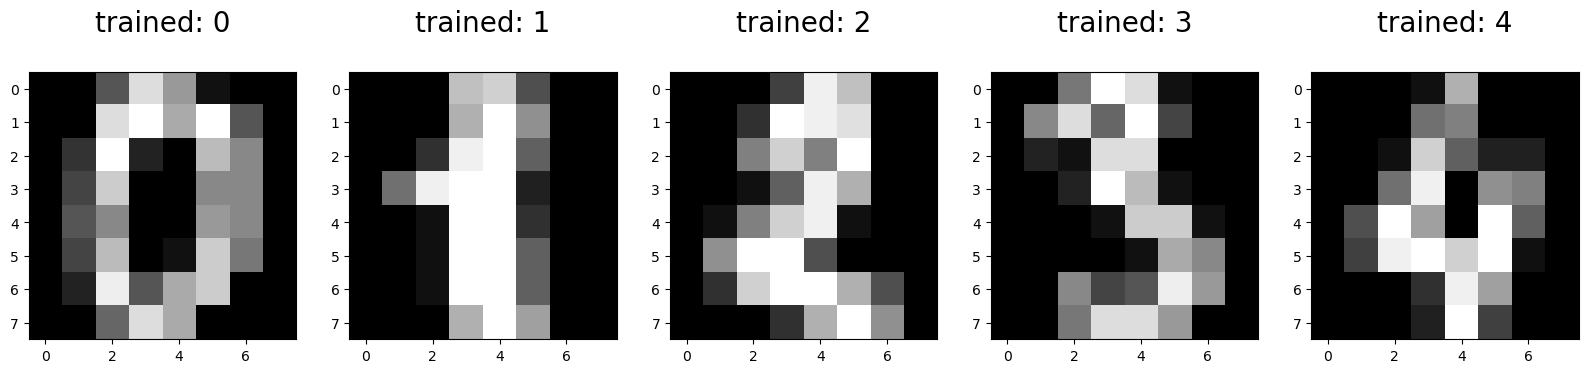

In [4]:
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8, 8)), cmap = plt.cm.gray)
    plt.title("training: %i\n" %label,fontsize = 20)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size =0.23, random_state =2)


In [6]:
print(x_train.shape)

(1383, 64)


In [7]:
print(y_train.shape)

(1383,)


In [8]:
print(x_test.shape)
print(y_test.shape)

(414, 64)
(414,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Fit the Logistic Regression model on the scaled data
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [10]:
print(lr.predict(x_test[0].reshape(1, -1)))

[1]


In [11]:
score = lr.score(x_test, y_test)
print(score)

0.8043478260869565


In [12]:
prediction   = lr.predict(x_test)

In [ ]:
index = 0
classi = []
for predict, actual in zip(prediction, y_test):
    if predict == actual:
        classi.append(index)
    index += 1

plt.figure(figsize=(20, 3))
for plotIn, wrong in enumerate(classi[0:4]):
    plt.subplot(1, 4, plotIn + 1)
    
    # Retrieve the image from digits.data
    image = digits.data[wrong]
    
    # Reshape and plot the image
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    
    # Corrected title formatting
    plt.title("Predict: {}, Actual: {}".format(prediction[wrong], y_test[wrong]), fontsize=20)

plt.show()
